In [ ]:
import math
import heapq

# Define the Cell class
class Cell:
    def __init__(self):
        self.parent_i = 0
        self.parent_j = 0
        self.f = float('inf')
        self.g = float('inf')
        self.h = 0

ROW = 9
COL = 10

# Check if a cell is valid (within the grid)
def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination
def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    # Trace the path from destination to source using parent cells
    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

    # Add the source cell to the path
    path.append((row, col))
    # Reverse the path to get the path from source to destination
    path.reverse()

    # Print the path
    for i in path:
        print("->", i, end=" ")
    print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
    # Initialize the details of each cell
    cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)

        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    trace_path(cell_details, dest)
                    found_dest = True
                    return
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    if not found_dest:
        print("Failed to find the destination cell")

def main():
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    src = [8, 0]
    dest = [0, 0]

    a_star_search(grid, src, dest)

if __name__ == "__main__":
    main()

The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 


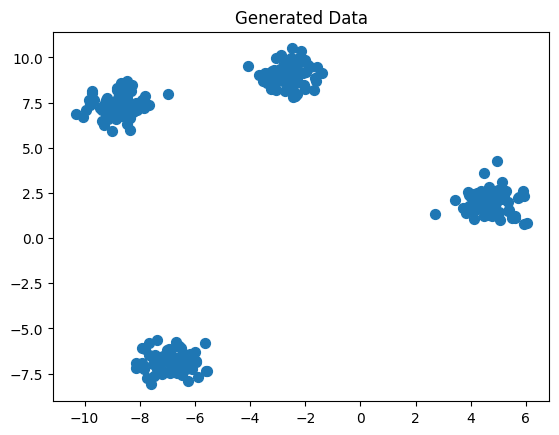

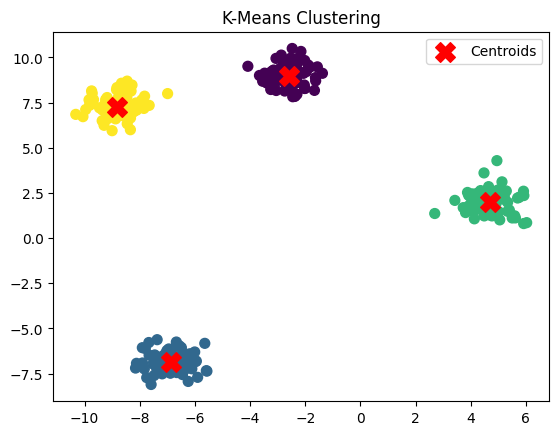

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generating a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualizing the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Getting the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [5]:
import csv
import numpy as np

def load_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)

    data = np.array(data[1:], dtype=float)
    X, y = data[:, :-1], data[:, -1]
    return X, y

def calculate_mean_variance(X, y):
    summaries = {}
    classes = np.unique(y)
    for cls in classes:
        X_cls = X[y == cls]
        summaries[cls] = [(np.mean(feature), np.var(feature)) for feature in zip(*X_cls)]
    return summaries

def gaussian_probability(x, mean, var):
    if var == 0:
        return 1.0 if x == mean else 0.0
    exponent = np.exp(-(x - mean)**2 / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

def predict(X, summaries):
    predictions = []
    for row in X:
        class_probs = {}
        for cls, feature_summaries in summaries.items():
            class_probs[cls] = 1
            for i, (mean, var) in enumerate(feature_summaries):
                class_probs[cls] *= gaussian_probability(row[i], mean, var)
        predictions.append(max(class_probs, key=class_probs.get))
    return predictions

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

filename = "/content/sample_data/mnist_train_small.csv"
X, y = load_csv(filename)

np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

summaries = calculate_mean_variance(X_train, y_train)

y_pred = np.array(predict(X_test, summaries))
print("Naïve Bayes Classifier Accuracy: {:.2f}%".format(accuracy(y_test, y_pred) * 100))


Naïve Bayes Classifier Accuracy: 100.00%
